<a href="https://colab.research.google.com/github/RichardTwit/App_Project_SpringBoard/blob/main/Suicide__Data_Analysis_Exploratory_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
from google.colab import drive


In [ ]:
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/My Drive/Suicide_Detection.csv')
df=df[:20000]
df.head()


,Unnamed: 0,text,class
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,3,Am I weird I don't get affected by compliments...,non-suicide
2,4,Finally 2020 is almost over... So I can never ...,non-suicide
3,8,i need helpjust help me im crying so hard,suicide
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  20000 non-null  int64 
 1   text        20000 non-null  object
 2   class       20000 non-null  object
dtypes: int64(1), object(2)
memory usage: 468.9+ KB


In [ ]:
df.describe()

,Unnamed: 0
count,20000.000000
mean,15044.700450
std,8714.546628
min,2.000000
25%,7482.750000
50%,15032.500000
75%,22642.250000
max,30123.000000


In [ ]:
# Corpus statistics
num_documents = len(df)
avg_doc_length = df['text'].apply(lambda x: len(x.split())).mean()
vocab_size = len(set(' '.join(df['text']).split()))

print("Number of documents:", num_documents)
print("Average document length:", avg_doc_length)
print("Vocabulary size:", vocab_size)



Number of documents: 20000
Average document length: 128.6673
Vocabulary size: 102604


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download NLTK resources (run only once)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Text cleaning
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = ''.join([c for c in text if c.isalnum() or c.isspace()])  # Remove special characters
    return text

# Tokenization, stopword removal, and lemmatization
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

df['cleaned_text'] = df['text'].apply(clean_text)
df['tokens'] = df['cleaned_text'].apply(word_tokenize)
df['filtered_tokens'] = df['tokens'].apply(lambda tokens: [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words])


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
df["class"].value_counts()


non-suicide    10135
suicide         9865
Name: class, dtype: int64

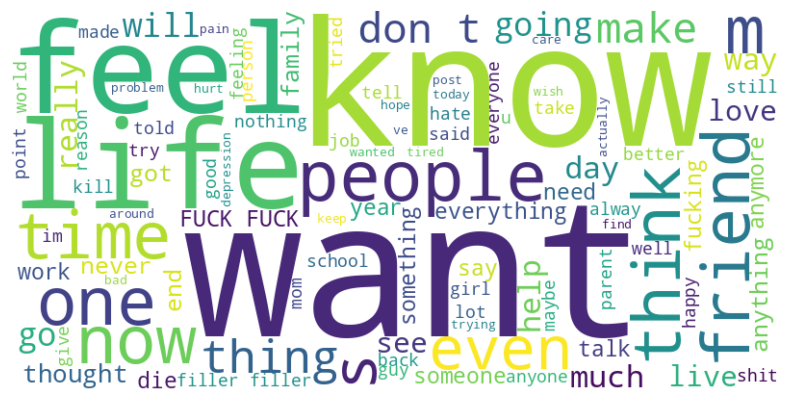

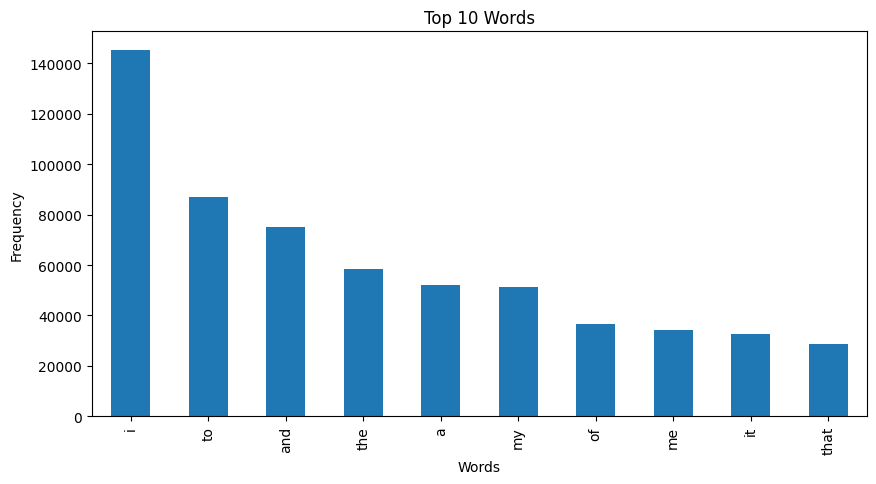

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(' '.join(df['text']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Bar chart of top words
top_words = pd.Series(' '.join(df['cleaned_text']).split()).value_counts().head(10)
plt.figure(figsize=(10, 5))
top_words.plot(kind='bar')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Words')
plt.show()


In [ ]:
df["cleaned_text"].head()

0    ex wife threatening suiciderecently i left my ...
1    am i weird i dont get affected by compliments ...
2    finally 2020 is almost over so i can never hea...
3            i need helpjust help me im crying so hard
4    im so losthello my name is adam 16 and ive bee...
Name: cleaned_text, dtype: object

In [ ]:
df['tokens'].head()

0    [ex, wife, threatening, suiciderecently, i, le...
1    [am, i, weird, i, dont, get, affected, by, com...
2    [finally, 2020, is, almost, over, so, i, can, ...
3    [i, need, helpjust, help, me, im, crying, so, ...
4    [im, so, losthello, my, name, is, adam, 16, an...
Name: tokens, dtype: object

In [ ]:
df['filtered_tokens'].head()

0    [ex, wife, threatening, suiciderecently, left,...
1    [weird, dont, get, affected, compliment, comin...
2    [finally, 2020, almost, never, hear, 2020, bad...
3                [need, helpjust, help, im, cry, hard]
4    [im, losthello, name, adam, 16, ive, strugglin...
Name: filtered_tokens, dtype: object

In [ ]:
import spacy

# Load the English NLP model
nlp = spacy.load('en_core_web_sm')

# NER and POS tagging
def get_entities(text):
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    pos_tags = [(token.text, token.pos_) for token in doc]
    return entities, pos_tags

df['entities'], df['pos_tags'] = zip(*df['cleaned_text'].apply(get_entities))


KeyboardInterrupt: ignored

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download NLTK resource (run only once)
nltk.download('vader_lexicon')

# Sentiment analysis using VADER
analyzer = SentimentIntensityAnalyzer()

def get_sentiment_score(text):
    return analyzer.polarity_scores(text)['compound']

df['sentiment_score'] = df['cleaned_text'].apply(get_sentiment_score)


In [ ]:
# Sentiment analysis visualization
plt.figure(figsize=(10, 5))
df['sentiment_score'].hist(bins=20)
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Sentiment Analysis')
plt.show()


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(data['cleaned_text'])

# Get top keywords for each document
def get_top_keywords(tfidf_matrix, tfidf_vectorizer, n_keywords):
    top_keywords = []
    for i in range(tfidf_matrix.shape[0]):
        sorted_indices = tfidf_matrix[i].toarray().argsort(axis=1)[:, -n_keywords:].flatten()[::-1]
        keywords = [tfidf_vectorizer.get_feature_names()[index] for index in sorted_indices]
        top_keywords.append(keywords)
    return top_keywords

n_keywords = 5
data['top_keywords'] = get_top_keywords(tfidf_matrix, tfidf_vectorizer, n_keywords)


In [ ]:
import pandas as pd
from nltk import bigrams, trigrams
from collections import Counter


# Tokenize the text into words for each row in the dataframe
#data['tokens'] = data['text'].apply(lambda x: x.lower().split())

# Extract bigrams and trigrams for each row
df['bigrams'] = df['filtered_tokens'].apply(lambda tokens: list(bigrams(tokens)))
df['trigrams'] = df['filtered_tokens'].apply(lambda tokens: list(trigrams(tokens)))

# Calculate frequency distribution of bigrams and trigrams for the entire dataframe
bigram_freq_dist = Counter([bigram for row in df['bigrams'] for bigram in row])
trigram_freq_dist = Counter([trigram for row in df['trigrams'] for trigram in row])

# Display the most common bigrams and trigrams
print("Most common bigrams:")
print(bigram_freq_dist.most_common(5))

print("\nMost common trigrams:")
print(trigram_freq_dist.most_common(5))


In [ ]:
# Plot histograms for bigram and trigram word counts
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(bigram_freq_dist, bins=10, edgecolor='black')
plt.xlabel("Bigram Word Count")
plt.ylabel("Frequency")
plt.title("Histogram of Bigram Word Counts")

plt.subplot(1, 2, 2)
plt.hist(trigram_word_count, bins=10, edgecolor='black')
plt.xlabel("Trigram Word Count")
plt.ylabel("Frequency")
plt.title("Histogram of Trigram Word Counts")

In [ ]:
from gensim.models import Word2Vec


# Train Word2Vec model
word2vec_model = Word2Vec(df['filtered_tokens'], vector_size=100, window=5, min_count=1, workers=4)

# Get word similarity
similarity_score = word2vec_model.wv.similarity('language', 'processing')
print("Similarity between 'language' and 'processing':", similarity_score)


In [ ]:
# Perform dependency parsing analysis on each document
def perform_dependency_parsing(doc):
    parsed_doc = nlp(doc)
    for token in parsed_doc:
        print(f"{token.text} --> {token.dep_} --> {token.head.text}")

# Apply the dependency parsing function to each document in the DataFrame
for idx, row in df.iterrows():
    print(f"Document {idx}:")
    perform_dependency_parsing(row["cleaned_text"])
    print()

Streaming output truncated to the last 5000 lines.

 --> dep --> her
so --> advmod --> does
jane --> nsubj --> dealing
has --> aux --> dealing
been --> aux --> dealing
dealing --> ccomp --> comes
with --> prep --> dealing
this --> det --> girl
girl --> pobj --> with
talking --> advcl --> dealing
to --> prep --> talking
her --> nsubj --> trying
trying --> pcomp --> to
to --> aux --> get
get --> xcomp --> trying
her --> dobj --> get
out --> prep --> get
of --> prep --> out
it --> pobj --> of
but --> cc --> dealing
nothing --> nsubj --> seems
seems --> conj --> dealing
to --> aux --> working
be --> aux --> working
working --> compound --> betty
betty --> nsubj --> is
is --> ccomp --> seems
past --> prep --> is
the --> det --> point
point --> pobj --> past
of --> prep --> point
caring --> pcomp --> of
for --> prep --> caring
anyone --> pobj --> for
and --> cc --> anyone
anything --> conj --> anyone
even --> advmod --> her
her --> poss --> dad
dad --> conj --> anyone
who --> dobj --> loves


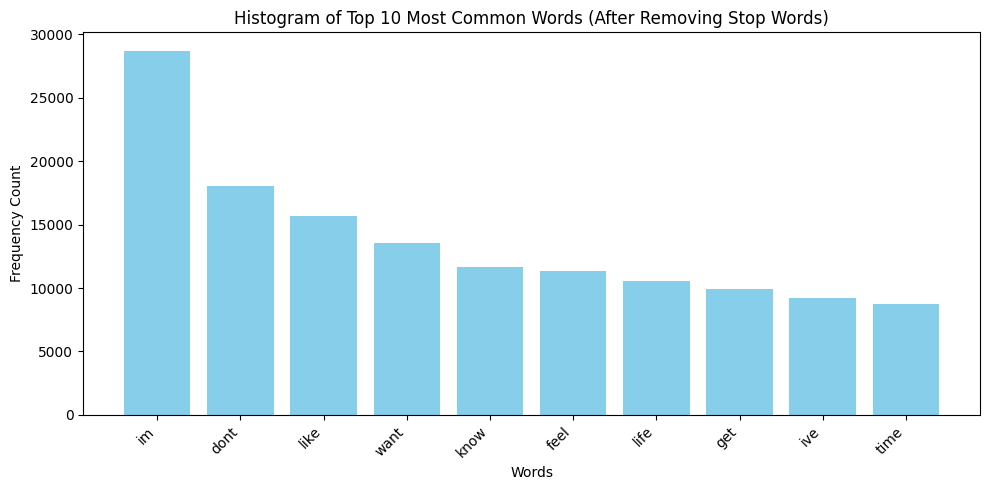

In [ ]:
# Tokenize the text into words and calculate word frequencies
words = " ".join(df['cleaned_text']).split()
word_freq = Counter(words)

# Plot the histogram of word frequencies
plt.figure(figsize=(10, 5))
plt.hist(list(word_freq.values()), bins=range(1, max(word_freq.values()) + 1), rwidth=0.8, color='skyblue')
plt.xticks(range(1, max(word_freq.values()) + 1))
plt.xlabel("Word Frequency")
plt.ylabel("Frequency Count")
plt.title("Histogram of Word Frequencies in DataFrame")
plt.show()

/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


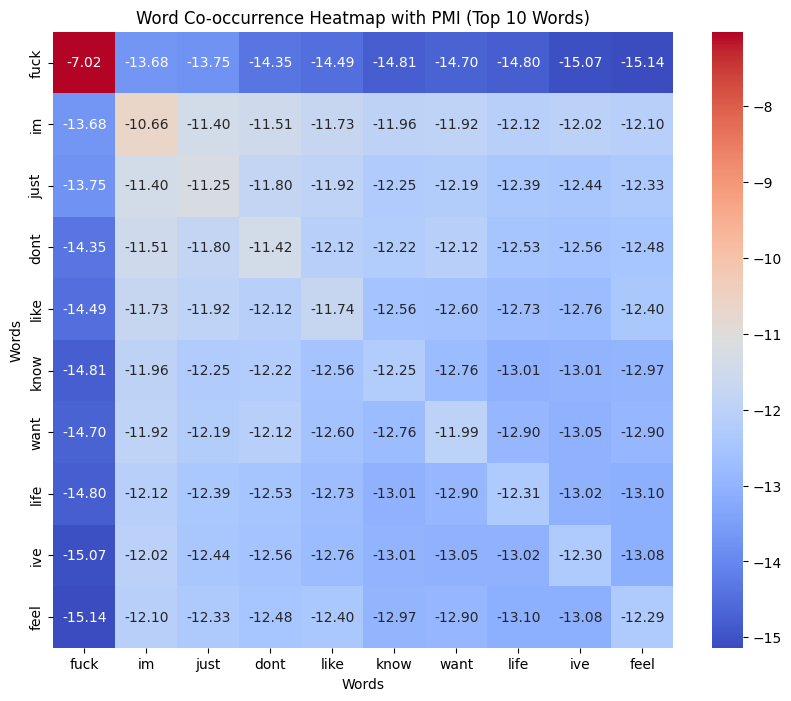

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import matplotlib.pyplot as plt


# Create a CountVectorizer to calculate the word co-occurrence matrix
vectorizer = CountVectorizer(stop_words='english', token_pattern=r'\b\w+\b')
X = vectorizer.fit_transform(df['cleaned_text'])

# Convert the co-occurrence matrix to a DataFrame
co_occurrence_matrix = pd.DataFrame(X.T.dot(X).toarray(), index=vectorizer.get_feature_names_out(), columns=vectorizer.get_feature_names_out())

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(co_occurrence_matrix, cmap='YlGnBu', annot=True, fmt='d')
plt.title("Word Co-occurrence Heatmap")
plt.xlabel("Words")
plt.ylabel("Words")
plt.show()
